***Klasifikasi Tugas Praktikum Big Data Week 2 Kelompok 2 Bagian Genap***


In [ ]:
# 1. Category Encoders
# Install Category Encoders
! pip install category_encoders

     |████████████████████████████████| 82 kB 370 kB/s 


In [ ]:
# Import Library for Data Manipulation
import pandas as pd
import category_encoders as ce 

# Import Library for Machine Learning
import sklearn.metrics as metrics

# Import Library for Visualization
import matplotlib. pyplot as plt
import seaborn as sns
import numpy as np; np.random.seed(0)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Import data local
from google.colab import files
uploaded = files.upload()

Saving credit_data2.csv to credit_data2.csv


In [ ]:
# open dataframe
df_credit = pd.read_csv('credit_data2.csv', sep = ';')
# Prints the Dataset Information
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           338 non-null    int64 
 1   sex           338 non-null    object
 2   job           338 non-null    int64 
 3   housing       338 non-null    object
 4   saving        338 non-null    object
 5   checking      338 non-null    object
 6   creditamount  338 non-null    int64 
 7   duration      338 non-null    int64 
 8   purpose       338 non-null    object
 9   risk          338 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 26.5+ KB


In [ ]:
# Prints Descriptive Statistics
df_credit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,338.0,34.482249,11.276455,19.0,26.00,31.0,41.0,74.0
job,338.0,1.943787,0.653527,0.0,2.00,2.0,2.0,3.0
creditamount,338.0,3859.085799,3465.723656,433.0,1345.25,2590.0,4985.5,18424.0
duration,338.0,24.426036,12.986714,6.0,12.50,24.0,36.0,72.0
risk,338.0,0.112426,0.316358,0.0,0.00,0.0,0.0,1.0


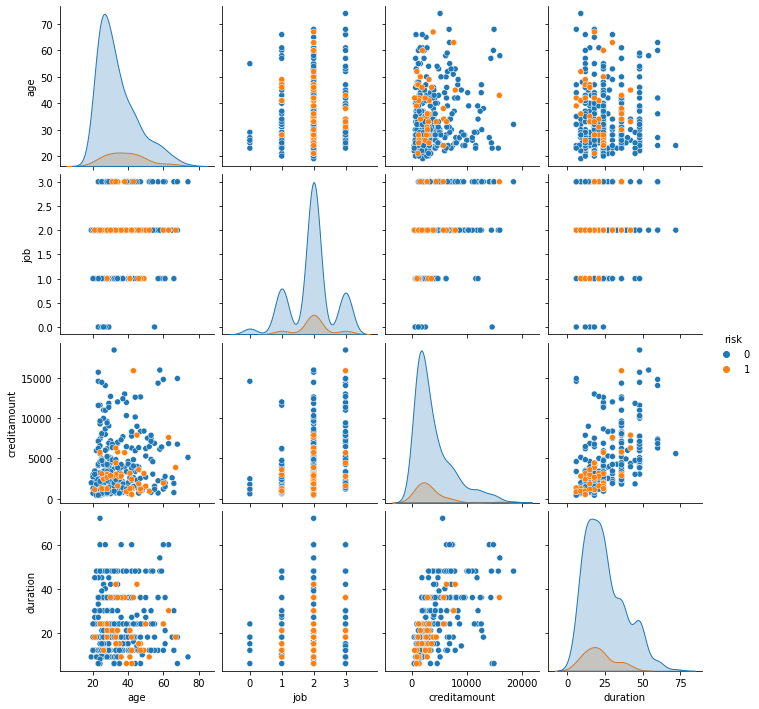

In [ ]:
# Set Graph Size 
plt.rcParams['figure.figsize'] = (16, 8)

# Visualize Pair Plot with Colors
sns.pairplot(df_credit, hue='risk')

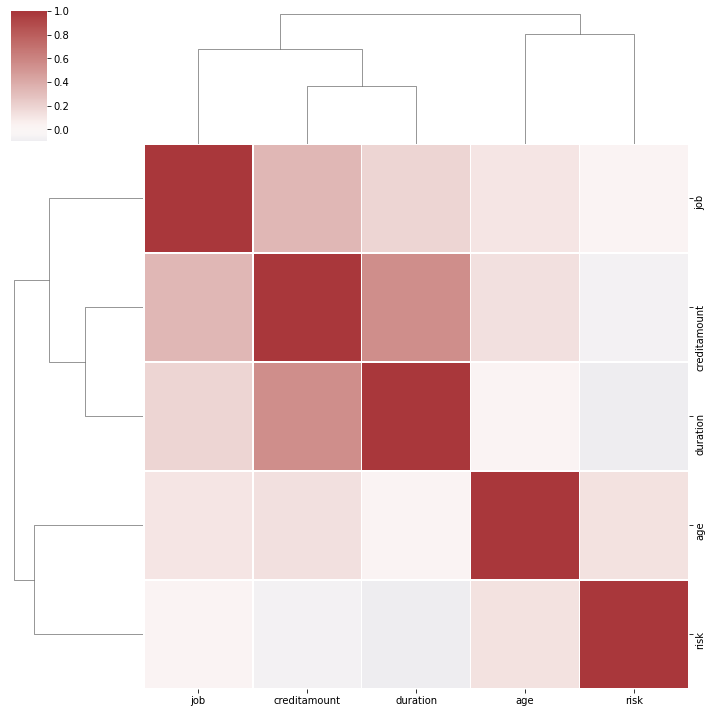

In [ ]:
# Draw Correlation Map
sns.clustermap(df_credit.corr(), center=0, cmap='vlag', linewidths=.75)

In [ ]:
# Check for Missing Values
df_credit.isnull().sum()

age             0
sex             0
job             0
housing         0
saving          0
checking        0
creditamount    0
duration        0
purpose         0
risk            0
dtype: int64

In [ ]:
# Import Module
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Encoder 
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_credit2= pd.DataFrame(encoder.fit_transform(df_credit[['sex', 'housing', 'saving', 'checking', 'purpose']]))
df_credit2.columns = encoder.get_feature_names(['sex', 'housing', 'saving', 'checking', 'purpose'])

# Concat the Encoded Data
df_credit_encoded = df_credit.drop(['sex', 'housing', 'saving', 'saving', 'checking', 'purpose'] ,axis=1, inplace=True)
df_credit_encoded = pd.concat([df_credit, df_credit2], axis=1) 

# Show Encoded Dataframe
df_credit_encoded

,age,job,creditamount,duration,risk,sex_female,sex_male,housing_free,housing_own,housing_rent,saving_little,saving_moderate,saving_quiterich,saving_rich,saving_unknown,checking_little,checking_moderate,checking_rich,checking_unknown,purpose_business,purpose_car,purpose_domesticappliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
0,38,2,1216,24,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,28,2,939,12,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24,2,2124,18,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,61,3,1953,36,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53,3,7485,30,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,47,2,1213,15,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
334,25,2,1258,24,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,30,2,2862,36,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
336,24,2,5743,24,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Select Features
feature = df_credit_encoded.drop(['risk'], axis=1)
feature

,age,job,creditamount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,saving_little,saving_moderate,saving_quiterich,saving_rich,saving_unknown,checking_little,checking_moderate,checking_rich,checking_unknown,purpose_business,purpose_car,purpose_domesticappliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
0,38,2,1216,24,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,28,2,939,12,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24,2,2124,18,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,61,3,1953,36,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53,3,7485,30,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,47,2,1213,15,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
334,25,2,1258,24,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,30,2,2862,36,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
336,24,2,5743,24,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Select Target
target = df_credit_encoded['risk']
target

0      0
1      0
2      0
3      0
4      0
      ..
333    1
334    1
335    1
336    1
337    1
Name: risk, Length: 338, dtype: int64

In [ ]:
# Import Module
from sklearn.model_selection import train_test_split, cross_val_score

# Set Training and Testing Data (70:30)
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, shuffle = True, test_size=0.3, random_state=1)

# Show the Training and Testing Data
print(feature_train.shape)
print(feature_test.shape)
print(target_train.shape)
print(target_test.shape)


(236, 26)
(102, 26)
(236,)
(102,)


***1. Model klasifikasi Decision Tree, K-NN, Naive bayes***

Decision Tree

In [ ]:
# Import Library 
from sklearn import tree

In [ ]:
# Modeling Decision Tree
dtree = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtree.fit(feature_train, target_train)

# Predict Test Data
target_predicted_dtree = dtree.predict(feature_test)
target_predicted_dtree

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

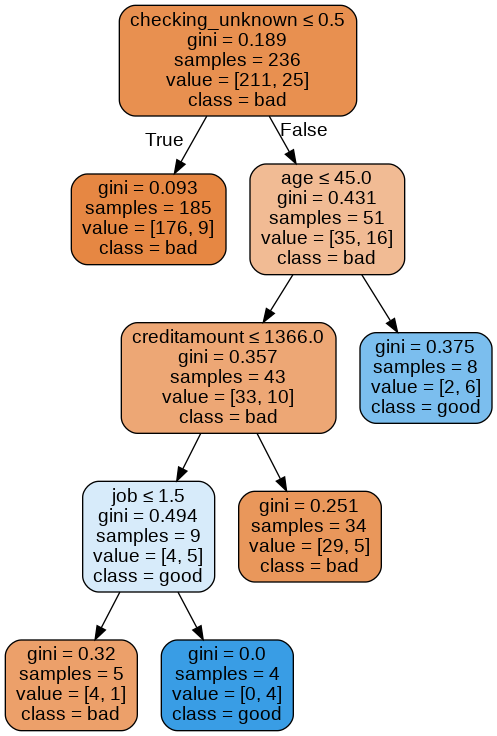

In [ ]:
# Visualize Tree

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, 
                filled=True, rounded=True,
                special_characters=True,
                class_names=['bad', 'good'],
                feature_names=['age', 'job', 'creditamount', 'duration', 'sex_female', 'sex_male', 'housing_free',
                               'housing own', 'housing_rent', 'saving_little', 'saving_moderate', 'saving_quiterich',
                               'saving_rich', 'saving_unknown', 'checking_little', 'checking_moderate', 'checking_rich',
                               'checking_unknown', 'purpose_business',
                               'purpose_car', 'purpose_domesticappliances', 'purpose_education', 'purpose_furniture/equipment',
                               'purpose_radio/TV', 'purpose_repairs', 'purpose_vacation/others'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

- Evaluasi Model Decision Tree

In [ ]:
# Confusion Matrix
cm_dtree = metrics.confusion_matrix(target_test, target_predicted_dtree)
cm_dtree

array([[85,  4],
       [11,  2]])

- !pip install scikit-plot

In [ ]:
!pip install scikit-plot

- Import Scikitplot untuk menampilkan visualisasi confusion matrix

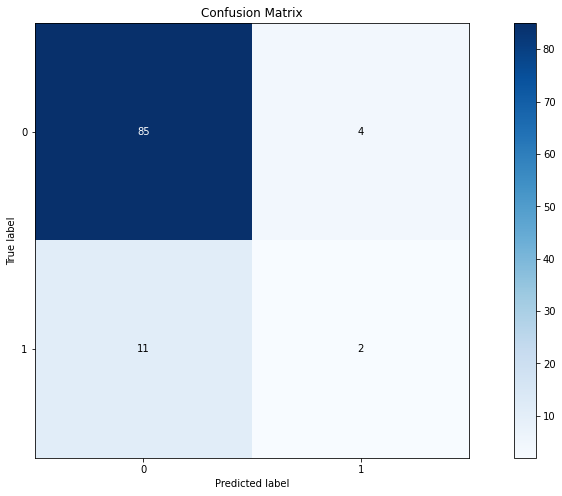

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(target_test, target_predicted_dtree)

- Akurasi, Precision, Recall dari Decision Tree

In [ ]:
# Accuracy, Precision, Recall
acc_dtree = metrics.accuracy_score(target_test, target_predicted_dtree)
prec_dtree = metrics.precision_score(target_test, target_predicted_dtree)
rec_dtree = metrics.recall_score(target_test, target_predicted_dtree)
f1_dtree = metrics.f1_score(target_test, target_predicted_dtree)
kappa_dtree = metrics.cohen_kappa_score(target_test, target_predicted_dtree)

# Show Accuracy, Precision, Recall
print('Accuracy:', acc_dtree)
print('Precision:', prec_dtree)
print('Recall:', rec_dtree)
print('F1 Score:', f1_dtree)
print('Cohens Kappa Score:', kappa_dtree)


Accuracy: 0.8529411764705882
Precision: 0.3333333333333333
Recall: 0.15384615384615385
F1 Score: 0.21052631578947367
Cohens Kappa Score: 0.14141414141414133


Dari hasil diatas, dapat disimpulkan bahwa nilai akurasi dari model Decision Tree sebesar 85% yang berarti dapat memprediksi dengan baik dan akurat

- Kurva ROC Decision Tree

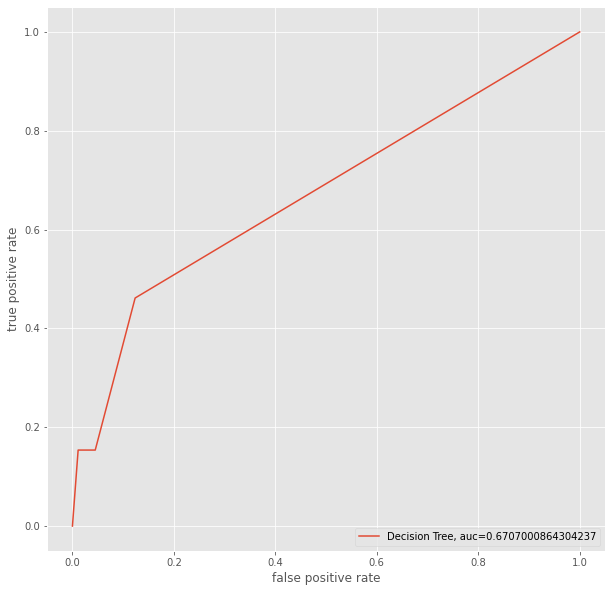

In [ ]:
# Import Visualization Package
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
target_predicted_dtree_prob = dtree.predict_proba(feature_test)[::,1]
fp_rate_dtree, tp_rate_dtree, _ = metrics.roc_curve(target_test,  target_predicted_dtree_prob)
auc_dtree = metrics.roc_auc_score(target_test, target_predicted_dtree_prob)
plt.plot(fp_rate_dtree, tp_rate_dtree, label='Decision Tree, auc='+str(auc_dtree))
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

KNN

In [ ]:
# Import Module
from sklearn.neighbors import KNeighborsClassifier

# Modeling KNN
knn = KNeighborsClassifier(n_neighbors= 71)
knn.fit(feature_train, target_train)

# Predict Test Data 
target_predicted_knn = knn.predict(feature_test)
target_predicted_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Confsion Matrix
cm_knn = metrics.confusion_matrix(target_test, target_predicted_knn)
cm_knn

array([[89,  0],
       [13,  0]])

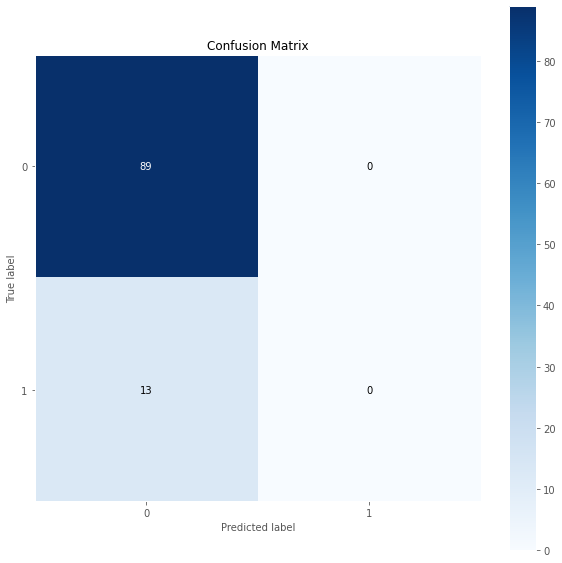

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(target_test, target_predicted_knn)

- Akurasi, Precision, Recall dari KNN

In [ ]:
# Accuracy, Precision, Recall
acc_knn = metrics.accuracy_score(target_test, target_predicted_knn)
prec_knn = metrics.precision_score(target_test, target_predicted_knn)
rec_knn = metrics.recall_score(target_test, target_predicted_knn)
f1_knn = metrics.f1_score(target_test, target_predicted_knn)
kappa_knn = metrics.cohen_kappa_score(target_test, target_predicted_knn)

# Show Accuracy, Precision, Recall
print('Accuracy:', acc_knn)
print('Precision:', prec_knn)
print('Recall:', rec_knn)
print('F1 Score:', f1_knn)
print('Cohens Kappa Score:', kappa_knn)

Accuracy: 0.8725490196078431
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Cohens Kappa Score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dari data diatas, disimpulkan bahwa akurasi dari model KNN sebesar 87% mampu memprediksi secara akurat dengan baik

- Kurva ROC KNN

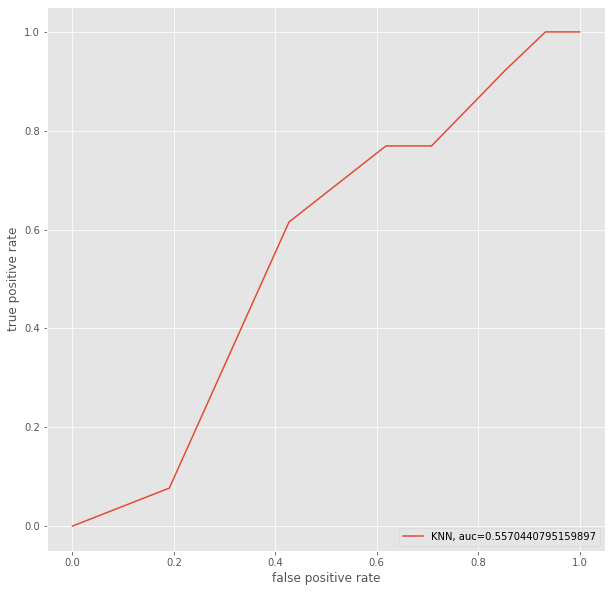

In [ ]:
# Import Visualization Package
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
target_predicted_knn_prob = knn.predict_proba(feature_test)[::,1]
fp_rate_knn, tp_rate_knn, _ = metrics.roc_curve(target_test,  target_predicted_knn_prob)
auc_knn = metrics.roc_auc_score(target_test, target_predicted_knn_prob)
plt.plot(fp_rate_knn, tp_rate_knn, label='KNN, auc='+str(auc_knn))
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

Naive Bayes

In [ ]:
# Import Module
from sklearn.naive_bayes import GaussianNB 

# Modeling Naive Bayes
nb = GaussianNB()
nb.fit(feature_train, target_train)

# Predict Test Data 
target_predicted_nb = nb.predict(feature_test)
target_predicted_nb

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Confsion Matrix
cm_nb = metrics.confusion_matrix(target_test, target_predicted_nb)
cm_nb

array([[78, 11],
       [ 7,  6]])

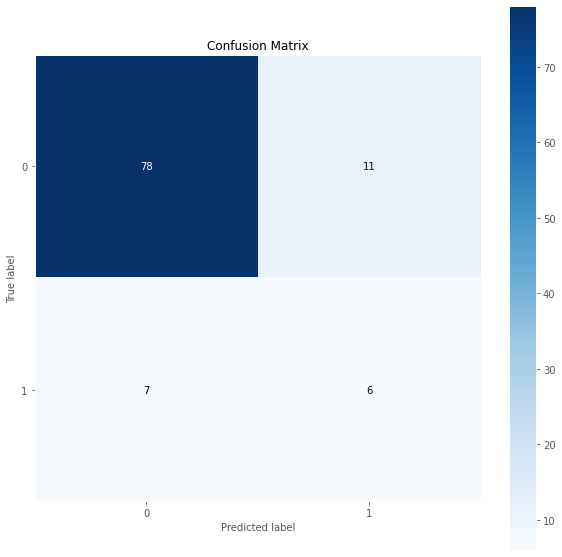

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(target_test, target_predicted_nb)

- Akurasi, Precision, Recall dari Naive Bayes

In [ ]:
# Accuracy, Precision, Recall
acc_nb = metrics.accuracy_score(target_test, target_predicted_nb)
prec_nb = metrics.precision_score(target_test, target_predicted_nb)
rec_nb = metrics.recall_score(target_test, target_predicted_nb)
f1_nb = metrics.f1_score(target_test, target_predicted_nb)
kappa_nb = metrics.cohen_kappa_score(target_test, target_predicted_nb)

# Show Accuracy, Precision, Recall
print('Accuracy:', acc_nb)
print('Precision:', prec_nb)
print('Recall:', rec_nb)
print('F1 Score:', f1_nb)
print('Cohens Kappa Score:', kappa_nb)

Accuracy: 0.8235294117647058
Precision: 0.35294117647058826
Recall: 0.46153846153846156
F1 Score: 0.4000000000000001
Cohens Kappa Score: 0.2987012987012987


Dari data diatas, disimpulkan bahwa akurasi dari model Naive Bayes sebesar 82% mampu memprediksi secara akurat dengan baik



- Kurva ROC Naive Bayes

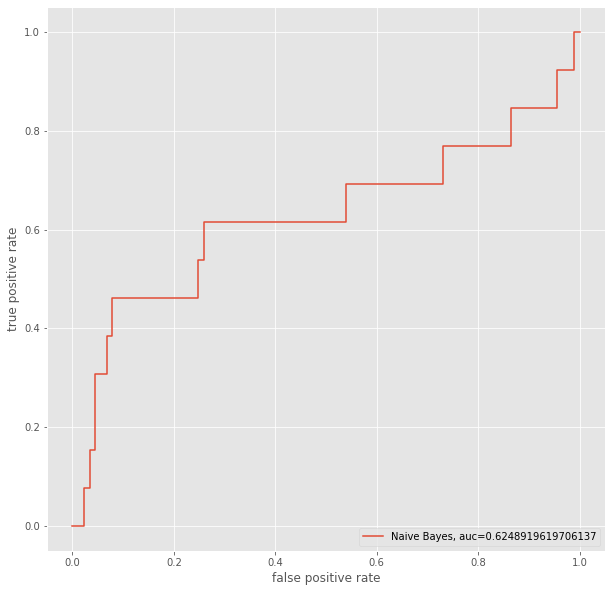

In [ ]:
# Import Visualization Package
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
target_predicted_nb_prob = nb.predict_proba(feature_test)[::,1]
fp_rate_nb, tp_rate_nb, _ = metrics.roc_curve(target_test,  target_predicted_nb_prob)
auc_nb = metrics.roc_auc_score(target_test, target_predicted_nb_prob)
plt.plot(fp_rate_nb, tp_rate_nb, label='Naive Bayes, auc='+str(auc_nb))
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

***1a. Hasil dari Decision Tree***

Berdasarkan hasil dari Decision Tree, pada visualisasi, jika Checking unknown kurang dari sama dengan 0.5, gini sebesar 0.189, samples sebesar 236, value [211, 25] termasuk dalam kelas bad atau buruk, lalu pada bagian True, jika gini sebesar 0.093, samples sebesar 185, value [176, 9] termasuk dalam kelas bad atau buruk, lalu masuk pada bagian False, jika age kurang dari sama dengan 45, gini sebesar 0.431, samples sebesar 51, value [35, 16] termasuk dalam kelas bad atau buruk, lalu gini sebesar 0.375 , samples sebesar 8, value [2, 6] termasuk dalam kelas good atau baik. Lanjut creditamount kurang dari sama dengan 1366, gini sebesar 0.357, samples sebesar 43, value [33, 10] termasuk dalam kelas bad atau buruk, lalu job kurang dari sama dengan 1.5 gini sebesar 0.494, samples sebesar 9, value [4, 5] termasuk dalam kelas good atau baik, lalu gini sebesar 0.251, samples sebesar 34, value [29, 5] termasuk dalam kelas bad atau buruk, Lalu gini sebesar 0.32, samples sebesar 5, value [4, 1] termasuk dalam kelas bad atau buruk. Dan terakhir gini sebesar 0.0, samples sebesar 4, value [0, 4] termasuk dalam kelas good atau baik.

***1b. Akurasi dari masing-masing model klasifikasi***

- Nilai akurasi dari model Decision Tree sebesar 85%
- Nilai akurasi dari model KNN sebesar 87% 
- Nilai akurasi dari model Naive Bayes sebesar 82%

***1c. Komparasi gambar kurva ROC dari masing-masing model klasifikasi dan yang lebih baik***


- Kurva ROC Model Decision Tree

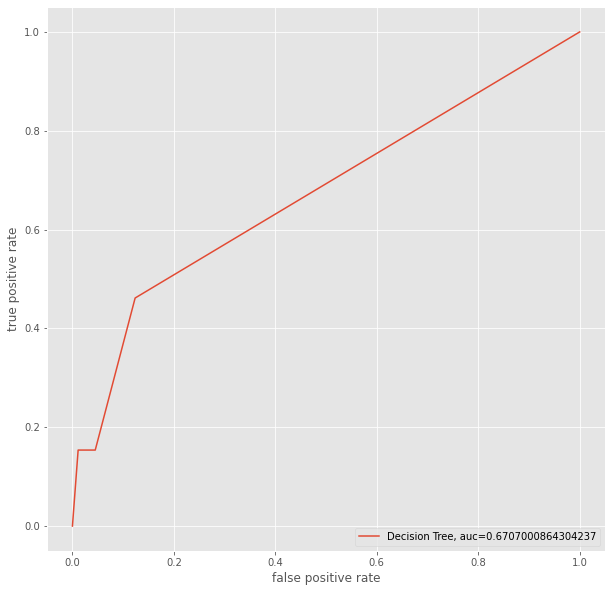

In [ ]:
# Import Visualization Package
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
target_predicted_dtree_prob = dtree.predict_proba(feature_test)[::,1]
fp_rate_dtree, tp_rate_dtree, _ = metrics.roc_curve(target_test,  target_predicted_dtree_prob)
auc_dtree = metrics.roc_auc_score(target_test, target_predicted_dtree_prob)
plt.plot(fp_rate_dtree, tp_rate_dtree, label='Decision Tree, auc='+str(auc_dtree))
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

Nilai Auc 0.67 artinya 67% ini kemungkinan model Decision Tree dapat membedakan kelas baik dan kelas buruk 

- Kurva ROC Model KNN

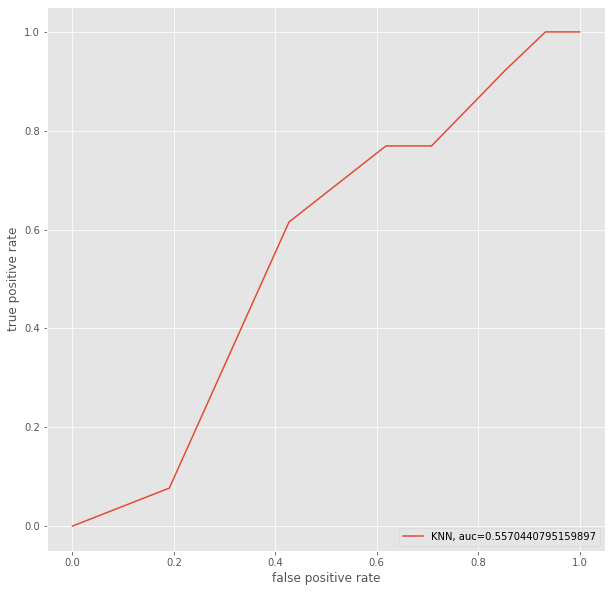

In [ ]:
# Import Visualization Package
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
target_predicted_knn_prob = knn.predict_proba(feature_test)[::,1]
fp_rate_knn, tp_rate_knn, _ = metrics.roc_curve(target_test,  target_predicted_knn_prob)
auc_knn = metrics.roc_auc_score(target_test, target_predicted_knn_prob)
plt.plot(fp_rate_knn, tp_rate_knn, label='KNN, auc='+str(auc_knn))
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

Nilai Auc 0.55 artinya 55% ini kemungkinan model KNN dapat membedakan kelas baik dan kelas buruk 

- Kurva ROC Model Naive Bayes

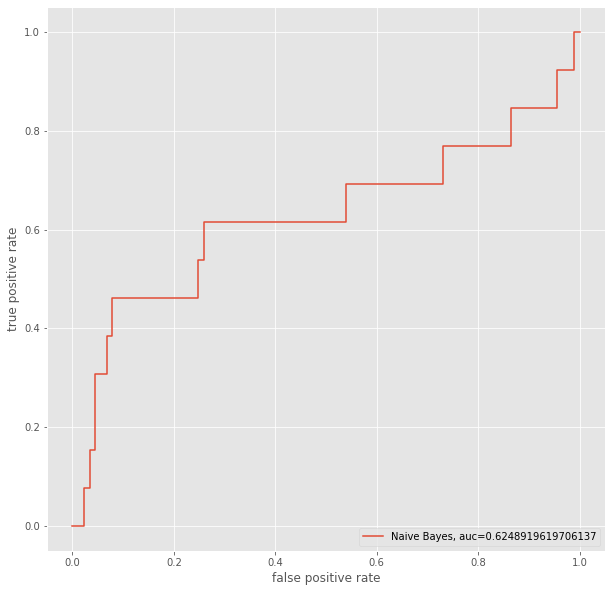

In [ ]:
# Import Visualization Package
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
target_predicted_nb_prob = nb.predict_proba(feature_test)[::,1]
fp_rate_nb, tp_rate_nb, _ = metrics.roc_curve(target_test,  target_predicted_nb_prob)
auc_nb = metrics.roc_auc_score(target_test, target_predicted_nb_prob)
plt.plot(fp_rate_nb, tp_rate_nb, label='Naive Bayes, auc='+str(auc_nb))
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

Nilai Auc 0.62 artinya 62% ini kemungkinan model Naive Bayes dapat membedakan kelas baik dan kelas buruk 

- Model klasifikasi yang paling baik berdasarkan kurva ROC dan nilai auc adalah model Decision Tree yang sebesar 0.67 atau 67% dimana semakin tinggi nilai auc yang didapat maka semakin baik juga untuk membedakan kelas baik dan kelas buruk